# 📖 Loading Necessary Libraries

In [1]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder   
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.pipeline import Pipeline 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap
import plotly.express as px
import country_converter as coco
import pycountry

plt.style.use('fivethirtyeight')
%matplotlib inline
pd.set_option('display.max_columns', 32)

# 💻 Loading Data

In [2]:
# Read the data from the CSV file
df = pd.read_csv('./Data/hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


# 🔎 Exploring the data

In [3]:
print(df.shape)
df.info()

(119390, 32)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  mea

# 📊 EDA 

In [4]:
# Copy of the df to analysis_df
analysis_df = df.copy()
analysis_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


### 🕵️‍♂️ Cancelled Vs Not Canceled

In [5]:
df_isCanceled = analysis_df['is_canceled'].value_counts().reset_index()

# Map the values of is_canceled to their respective names and add a percentage column
df_isCanceled['is_canceled'] = df_isCanceled['is_canceled'].map({0: 'Not Canceled', 1: 'Canceled'})
df_isCanceled['percentage'] = round((df_isCanceled['count'] / df_isCanceled['count'].sum()) * 100, 2)
df_isCanceled['percentage'] = df_isCanceled['percentage'].astype(str) + '%' 
print(df_isCanceled)

    is_canceled  count percentage
0  Not Canceled  75166     62.96%
1      Canceled  44224     37.04%


In [6]:
# Create bar chart showing the Canceled vs Non-canceled bookings
fig = px.bar(
    df_isCanceled,
    x='is_canceled',
    y='count',
    text='percentage',
    title='Canceled vs Non-Canceled Bookings',
    labels={'is_canceled': 'Booking Status', 'count': 'Number of Bookings', 'percentage': 'Percentage of Bookings'},
    color='is_canceled',
    color_discrete_map={0: 'green', 1: 'red'},
    template="plotly_dark"  
)
fig.show()


In [7]:
# Get all not canceled bookings
df_not_canceled = analysis_df[analysis_df['is_canceled'] == 0]

print ( 'Not canceled Bookings: ', analysis_df[analysis_df['is_canceled'] == 0].shape[0])

Not canceled Bookings:  75166


### 🕵️‍♂️ First Observation:

#### The majority of reservations occur in the months of July and August, while the fewest bookings are made at the start and close of the year.

In [8]:
# Create a Lollipop chart showing Booking trends per month
# Group the data by arrival_date_month and count the number of bookings
df_monthly_trends = df_not_canceled.groupby('arrival_date_month').size().reset_index(name='count')
df_monthly_trends['month'] = pd.Categorical(df_monthly_trends['arrival_date_month'], categories=[
    'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'
], ordered=True)
df_monthly_trends = df_monthly_trends.sort_values('month')

# Create a scatter plot for the lollipops
fig = px.scatter(
    df_monthly_trends,
    x='month',
    y='count',
    title='Monthly Booking Trends',
    labels={'count': 'Number of Bookings', 'month': 'Month'},
    template="plotly_dark"  
)

# Create the lollipop sticks
fig.add_bar(x=df_monthly_trends['month'], y=df_monthly_trends['count'], marker=dict(color='mediumvioletred'))

fig.show()

### 🕵️‍♂️ Second Observation:

#### City Hotels have more monthly bookings and overall bookings than Resort Hotels.
#### Both hotels have the fewest guests during the winter.

In [9]:
# Show the total number of guests per month for each hotel in the same line chart
# Group the data by arrival_date_month, hotel and count the number of guests
df_guests_per_month = analysis_df.groupby(['arrival_date_month', 'hotel']).size().reset_index(name='count')
df_guests_per_month['month'] = pd.Categorical(df_guests_per_month['arrival_date_month'], categories=[
    'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'
], ordered=True)
df_guests_per_month = df_guests_per_month.sort_values('month')

# Create a line chart showing the total number of guests per month for each hotel
fig = px.line(
    df_guests_per_month,
    x='month',
    y='count',
    title='Total Number of Guests per Month for Each Hotel',
    labels={'count': 'Number of Guests', 'month': 'Month', 'hotel': 'Hotel'},
    color='hotel',
    template="plotly_dark" 
)

fig.show()

### 🕵️‍♂️ Third Observation:

#### The number of guests from Portugal is significantly higher than the other countries.

#### Portugal, Great Britain and France account for 50% of the guests.

In [10]:
# make a folium map to show the distribution of the guests by country
# Group the data by country and count the number of guests
df_guests_by_country = analysis_df.groupby('country').size().reset_index(name='count')
df_guests_by_country = df_guests_by_country.sort_values('count', ascending=False)

# Create a folium map to show the distribution of the guests by country
basemap = folium.Map()
guests_map = px.choropleth(df_guests_by_country, locations = df_guests_by_country['country'],
                           color = df_guests_by_country['count'], hover_name = df_guests_by_country['country'])
guests_map.show()

In [11]:
# Create a histogram to visualize the distribution of guests by country
fig = px.histogram(
    df_guests_by_country,
    x='country',
    y='count',
    title='Distribution of Guests by Country',
    labels={'count': 'Number of Guests', 'country': 'Country'},
    template="plotly_dark"  
)

# Rotate the x-axis labels for better readability
fig.update_xaxes(tickangle=45)

# add a label showing the sum of total number of guests 
fig.add_annotation(x=0.5, y=1.1, xref='paper', yref='paper', text='Total Number of Guests: ' + str(df_guests_by_country['count'].sum()), showarrow=False)

fig.show()

In [12]:
# Take a alpha-3 country code as an argument and return the corresponding country name
def get_country_name(code):
  try:
    return pycountry.countries.get(alpha_3=code).name
  except:
    return 'Unknown'
  
# Take a country name as an argument and return the corresponding continent
def get_continent_name(country):
  if country != 'Unknown':
    return coco.convert(names=country, to='continent')
  else:
    return 'Unknown'

In [13]:
# make a pie chart to show the proportion of bookings across continents
# Group the data by country and count the number of guests
df_guests_by_country['country_name'] = df_guests_by_country['country'].apply(get_country_name)
df_guests_by_country['continent'] = df_guests_by_country['country_name'].apply(get_continent_name)
df_guests_by_continent = df_guests_by_country.groupby('continent').sum().reset_index()

# Create a pie chart to show the proportion of bookings across continents
fig = px.pie(
    df_guests_by_continent,
    values='count',
    names='continent',
    title='Proportion of Bookings Across Continents',
    template="plotly_dark"  # Add this line for dark mode
)

fig.show()

# The “Unknown” category suggests that for some guests, the continent of origin could not be determined.

### 🕵️‍♂️ Fourth Observation:

#### This plot clearly shows that prices in the Resort Hotel are much higher during the summer and prices of city hotel varies less.

In [14]:
# visualize the room price per night over the months for each hotel
# Group the data by arrival_date_month, hotel and calculate the average price per night
df_price_per_night = analysis_df.groupby(['arrival_date_month', 'hotel'])['adr'].mean().reset_index()
# round the adr to the nearest 2 decimals 
df_price_per_night['adr'] = df_price_per_night['adr'].round(2)
df_price_per_night['month'] = pd.Categorical(df_price_per_night['arrival_date_month'], categories=[
    'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'
], ordered=True)
df_price_per_night = df_price_per_night.sort_values('month')

# Create a line chart showing the average price per night over the months for each hotel
fig = px.line(
    df_price_per_night,
    x='month',
    y='adr',
    title='Room Price per Night Over the Months for Each Hotel',
    labels={'adr': 'Price per Night', 'month': 'Month', 'hotel': 'Hotel'},
    color='hotel',
    template="plotly_dark"  # Add this line for dark mode
)

fig.show()


### 🕵️‍♂️ Fifth Observation:

#### In general, city hotels appear to generate higher revenues compared to resort hotels across all room types. 

#### Room type A are the most profitable for both city and resort hotels.

In [15]:
# The Bar plot shows the total revenue by room and hotel type
# Calculate the total revenue by room and hotel type
analysis_df['revenue'] = analysis_df['adr'] * (analysis_df['stays_in_weekend_nights'] + analysis_df['stays_in_week_nights'])
df_revenue_by_room_and_hotel = analysis_df.groupby(['reserved_room_type', 'hotel'])['revenue'].sum().reset_index()

# Create a bar plot showing the total revenue by room and hotel type
fig = px.bar(
    df_revenue_by_room_and_hotel,
    x='reserved_room_type',
    y='revenue',
    title='Total Revenue by Room and Hotel Type',
    labels={'revenue': 'Revenue', 'reserved_room_type': 'Room Type', 'hotel': 'Hotel'},
    color='hotel',
    template="plotly_dark"  # Add this line for dark mode
)

fig.show()

### 🕵️‍♂️ Sixth Observation:

There is a great loss over the years in the revenue due to cancellations for both city and resort hotels, but it is more obvious in the city hotels significantly.

There can be several reasons why City hotels experience more cancellations than resort hotels such as:
- **Business travelers and flexible plans:** City hotels cater more to business travelers, whose schedules can change unexpectedly. This flexibility can lead to more frequent cancellations compared to resort guests, who typically have pre-planned vacations.

- Moreover, our dataset reflects this pattern. City hotels have a significantly higher number of reservations (79330) compared to resorts (40060). Therefore, the likelihood of cancellations increases with the number of bookings.

In [16]:
# show the annual loss in revenue due to cancellations using grouped bar chart for the 3 years with horizontal orientation
# Calculate the total revenue by year from the is_canceled = 1 for each hotel
df_canceled_revenue = analysis_df[analysis_df['is_canceled'] == 1].groupby(['arrival_date_year', 'hotel'])['revenue'].sum().reset_index()

# Create a grouped bar chart showing the total revenue by year from the is_canceled = 1 for each hotel
fig = px.bar(
    df_canceled_revenue,
    x='revenue',
    y='arrival_date_year',
    title='Annual Loss in Revenue Due to Cancellations',
    labels={'revenue': 'Revenue Lost', 'arrival_date_year': 'Year', 'hotel': 'Hotel'},
    color='hotel',
    barmode='group',
    orientation='h',
    template="plotly_dark"  # Add this line for dark mode
)

fig.show()


#  ⚙️ Preprocessing

## ⚠️ Handling Missing Values

In [17]:
# Selecting columns with missing values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values

children         4
country        488
agent        16340
company     112593
dtype: int64

In [18]:
# Calculate the percentage of missing values per column
missing_values = missing_values * 100 / len(df)
missing_values

children     0.003350
country      0.408744
agent       13.686238
company     94.306893
dtype: float64

In [19]:
# Drop the columns agent , company
df.drop(['agent','company'], axis=1, inplace=True)

In [20]:
df.isnull().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
days_in_waiting_list                0
customer_type                       0
adr                                 0
required_car

In [21]:
# Drop the rows with missing values in the column 'country'
df = df.dropna(subset=['country'])

In [22]:
# Replace missing values in the column 'children' with 0
df['children'] = df['children'].fillna(0)

In [23]:
# Drop the rows if the values = 0 in the column 'adult' and 'children' and 'babies'
df = df.drop(df[(df.adults+df.children+df.babies)==0].index)

In [24]:
# Count the columns with missing values
if df.isnull().sum().sum() == 0:
    print('No missing values')

No missing values


# 🛠️ Feature Engineering

### 🔒 Preventing Data Leakage

The `reservation_status` column is essentially a duplicate of the `is_canceled` column. To prevent data leakage, we should drop this column.

The `reservation_status_date` column provides information about when the booking was canceled or when the customer checked out of the hotel.

In [25]:
df.drop(['reservation_status', 'reservation_status_date'], axis=1, inplace=True)
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.00,0,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.00,0,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.00,0,0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.00,0,0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,96.14,0,0
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,0,Transient,225.43,0,2
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient,157.71,0,4
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,104.40,0,0


### 

### 🤖 Encoding the categorical columns and discretizing the numerical columns

1. **Encoding Categorical Columns**: Categorical data is often not suitable for direct use in machine learning algorithms. We will transform these columns into a format that can be better understood by the algorithms.

2. **Discretizing Numerical Columns**: Continuous numerical data can sometimes be more useful when segmented into discrete intervals, or bins. We will apply this technique to appropriate numerical columns.

In [26]:
# Merge the rows of 'required_car_parking_spaces' into two categories: 0 and 1
print(df['required_car_parking_spaces'].value_counts())
df.loc[df['required_car_parking_spaces'] > 0, 'required_car_parking_spaces'] = 1
df['required_car_parking_spaces'].value_counts()

required_car_parking_spaces
0    111429
1      7270
2        28
3         3
8         2
Name: count, dtype: int64


required_car_parking_spaces
0    111429
1      7303
Name: count, dtype: int64

In [27]:
# Split the data into two data frames: one for the numerical columns and one for the categorical columns
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_cat = df.select_dtypes(include = ['object'])

In [28]:
df_num.shape, df_cat.shape

((118732, 18), (118732, 10))

In [29]:
# Remove the target column 'is_canceled' from the df_num data frame
df_num = df_num.drop(['is_canceled'], axis=1)

# Show the numerical columns
numerical_features = df_num.columns.tolist()
df_num

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,342,2015,27,1,0,0,2,0.0,0,0,0,0,3,0,0.00,0,0
1,737,2015,27,1,0,0,2,0.0,0,0,0,0,4,0,0.00,0,0
2,7,2015,27,1,0,1,1,0.0,0,0,0,0,0,0,75.00,0,0
3,13,2015,27,1,0,1,1,0.0,0,0,0,0,0,0,75.00,0,0
4,14,2015,27,1,0,2,2,0.0,0,0,0,0,0,0,98.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,23,2017,35,30,2,5,2,0.0,0,0,0,0,0,0,96.14,0,0
119386,102,2017,35,31,2,5,3,0.0,0,0,0,0,0,0,225.43,0,2
119387,34,2017,35,31,2,5,2,0.0,0,0,0,0,0,0,157.71,0,4
119388,109,2017,35,31,2,5,2,0.0,0,0,0,0,0,0,104.40,0,0


In [30]:
# Show the categorical columns
categorical_features = df_cat.columns.tolist()
df_cat

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type
0,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient
1,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient
2,Resort Hotel,July,BB,GBR,Direct,Direct,A,C,No Deposit,Transient
3,Resort Hotel,July,BB,GBR,Corporate,Corporate,A,A,No Deposit,Transient
4,Resort Hotel,July,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient
...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,August,BB,BEL,Offline TA/TO,TA/TO,A,A,No Deposit,Transient
119386,City Hotel,August,BB,FRA,Online TA,TA/TO,E,E,No Deposit,Transient
119387,City Hotel,August,BB,DEU,Online TA,TA/TO,D,D,No Deposit,Transient
119388,City Hotel,August,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient


In [31]:
# Sort the indices of df_num to start from 0 to n
df_num = df_num.reset_index(drop=True)
df_num

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,342,2015,27,1,0,0,2,0.0,0,0,0,0,3,0,0.00,0,0
1,737,2015,27,1,0,0,2,0.0,0,0,0,0,4,0,0.00,0,0
2,7,2015,27,1,0,1,1,0.0,0,0,0,0,0,0,75.00,0,0
3,13,2015,27,1,0,1,1,0.0,0,0,0,0,0,0,75.00,0,0
4,14,2015,27,1,0,2,2,0.0,0,0,0,0,0,0,98.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118727,23,2017,35,30,2,5,2,0.0,0,0,0,0,0,0,96.14,0,0
118728,102,2017,35,31,2,5,3,0.0,0,0,0,0,0,0,225.43,0,2
118729,34,2017,35,31,2,5,2,0.0,0,0,0,0,0,0,157.71,0,4
118730,109,2017,35,31,2,5,2,0.0,0,0,0,0,0,0,104.40,0,0


In [32]:
# Get variance of df_num
df_num.var()

lead_time                         11430.839504
arrival_date_year                     0.500523
arrival_date_week_number            184.583890
arrival_date_day_of_month            77.096450
stays_in_weekend_nights               0.985493
stays_in_week_nights                  3.568646
adults                                0.330277
children                              0.159546
babies                                0.009496
is_repeated_guest                     0.030594
previous_cancellations                0.716402
previous_bookings_not_canceled        2.206041
booking_changes                       0.408199
days_in_waiting_list                310.914674
adr                                2539.228392
required_car_parking_spaces           0.057725
total_of_special_requests             0.628437
dtype: float64

In [33]:
# normalizing numerical variables from 0 to 1
numerical_pipeline_minmax = MinMaxScaler()


In [34]:
# Define the pipeline for numerical columns
numerical_pipeline_discretizer = Pipeline([
    ('discretizer', KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile'))
])

In [35]:
# Define the pipeline for categorical columns
categorical_pipeline = Pipeline([
    ('encoder', OrdinalEncoder())
])

In [36]:
# numerical_features_zero_mean = ['children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'days_in_waiting_list', 'required_car_parking_spaces']

# Remove the columns with zero mean from the list of numerical columns
# numerical_features_no_zero_mean = list(set(numerical_features) - set(numerical_features_zero_mean))

# Column transformer to apply different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('label', 'passthrough', ['is_canceled']),
        ('num', numerical_pipeline_discretizer, numerical_features),
        ('cat', categorical_pipeline, categorical_features),
    ],
    remainder='drop' 
)

In [37]:
# Fit and transform the data
transformed_data = preprocessor.fit_transform(df)

C:\Users\ahmed\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_discretization.py:322: UserWarning:

Bins whose width are too small (i.e., <= 1e-8) in feature 1 are removed. Consider decreasing the number of bins.

C:\Users\ahmed\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_discretization.py:322: UserWarning:

Bins whose width are too small (i.e., <= 1e-8) in feature 4 are removed. Consider decreasing the number of bins.

C:\Users\ahmed\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_discretization.py:322: UserWarning:

Bins whose width are too small (i.e., <= 1e-8) in feature 5 are removed. Consider decreasing the number of bins.

C:\Users\ahmed\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_discretization.py:322: UserWarning:

Bins whose width are too small (i.e., <= 1e-8) in feature 6 are removed. Consider decreasing the number of bins.

C:\Users\ahmed\AppData\Roaming\Python\Python311\site-pac

In [38]:
# Convert the transformed data back to DataFrame
transformed_df = pd.DataFrame(transformed_data, columns=['is_canceled'] + numerical_features + categorical_features )
transformed_df.head()

# # Merge the columns with zero mean back to the transformed data with index
# transformed_df = pd.concat([transformed_df, df[numerical_features_zero_mean]], axis=1)


,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type
0,0.0,9.0,0.0,4.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,5.0,0.0,135.0,3.0,1.0,2.0,2.0,0.0,2.0
1,0.0,9.0,0.0,4.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,5.0,0.0,135.0,3.0,1.0,2.0,2.0,0.0,2.0
2,0.0,1.0,0.0,4.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,1.0,5.0,0.0,59.0,3.0,1.0,0.0,2.0,0.0,2.0
3,0.0,2.0,0.0,4.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,1.0,5.0,0.0,59.0,2.0,0.0,0.0,0.0,0.0,2.0
4,0.0,2.0,0.0,4.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,1.0,1.0,5.0,0.0,59.0,6.0,3.0,0.0,0.0,0.0,2.0


In [39]:
transformed_df[numerical_features]

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,9.0,0.0,4.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,9.0,0.0,4.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,4.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
3,2.0,0.0,4.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
4,2.0,0.0,4.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118727,2.0,1.0,6.0,9.0,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0
118728,6.0,1.0,6.0,9.0,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,2.0
118729,3.0,1.0,6.0,9.0,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,2.0
118730,6.0,1.0,6.0,9.0,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0


In [40]:
transformed_df[categorical_features]

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type
0,1.0,5.0,0.0,135.0,3.0,1.0,2.0,2.0,0.0,2.0
1,1.0,5.0,0.0,135.0,3.0,1.0,2.0,2.0,0.0,2.0
2,1.0,5.0,0.0,59.0,3.0,1.0,0.0,2.0,0.0,2.0
3,1.0,5.0,0.0,59.0,2.0,0.0,0.0,0.0,0.0,2.0
4,1.0,5.0,0.0,59.0,6.0,3.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...
118727,0.0,1.0,0.0,15.0,5.0,3.0,0.0,0.0,0.0,2.0
118728,0.0,1.0,0.0,56.0,6.0,3.0,4.0,4.0,0.0,2.0
118729,0.0,1.0,0.0,43.0,6.0,3.0,3.0,3.0,0.0,2.0
118730,0.0,1.0,0.0,59.0,6.0,3.0,0.0,0.0,0.0,2.0


In [41]:
transformed_df.isna().sum()

is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
days_in_waiting_list              0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
hotel                             0
arrival_date_month                0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
reserved_room_type                0
assigned_room_type                0
deposit_type                      0
customer_type               

### 📈 Analyzing Correlation Between Target and Independent Features

In this section, we will examine the correlation between our target variable and the independent features. Understanding these relationships is crucial for feature selection and model performance. By identifying and focusing on the most relevant features, we can improve the efficiency and accuracy of our predictive model.

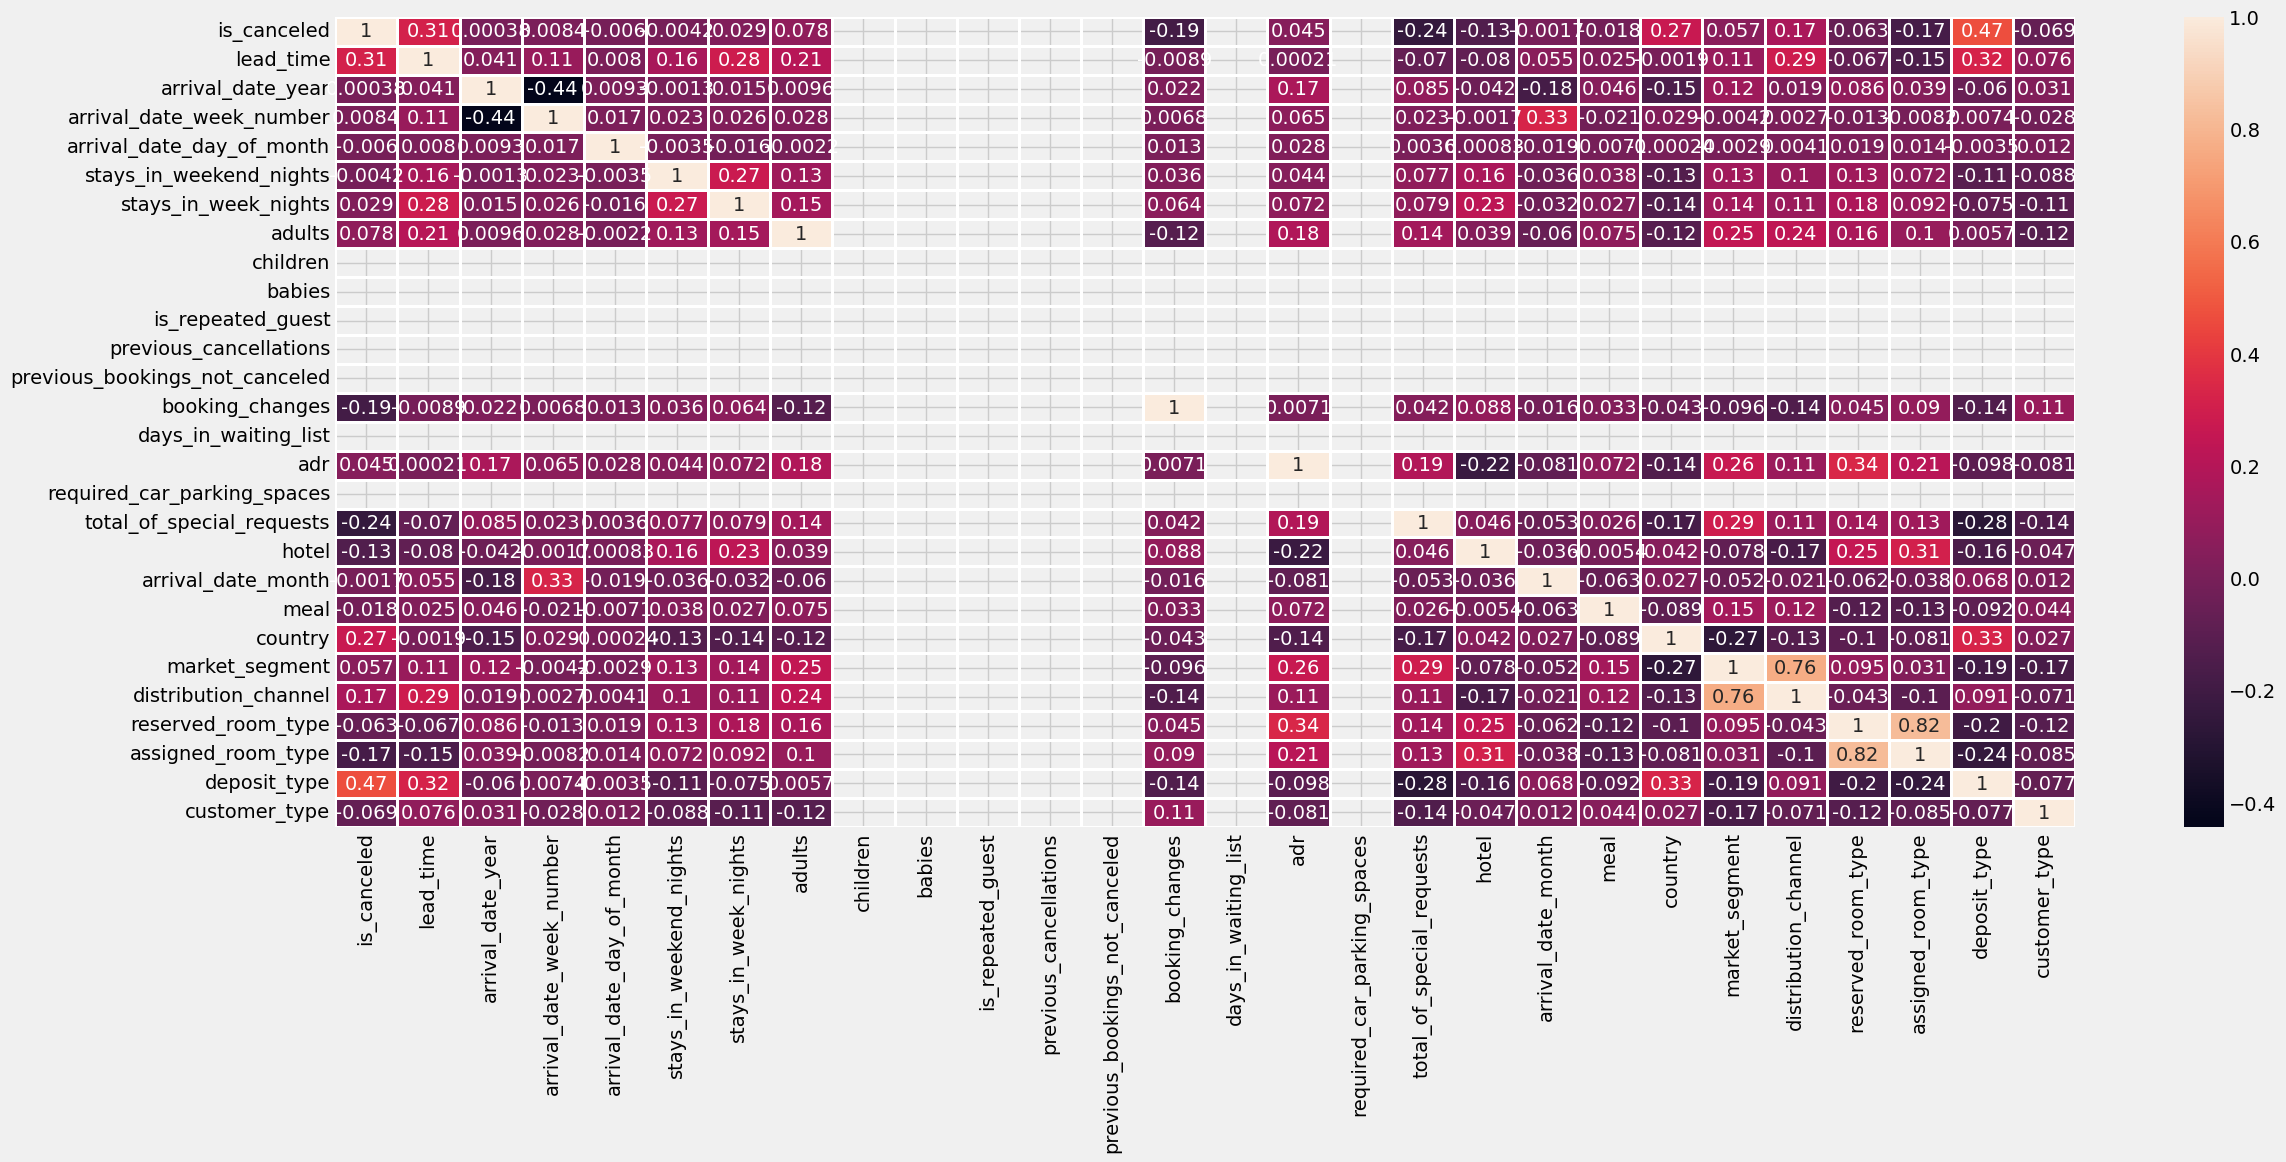

In [42]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize = (25, 10))

corr = transformed_df.corr(method = 'pearson')
sns.heatmap(corr, annot = True, linewidths = 1)
plt.show()

In [43]:
# Calculate absolute correlation with 'is_canceled'
correlation = transformed_df.corr()['is_canceled'].abs()

# Sort by correlation and select the top 10 features
top_10_features = correlation.sort_values(ascending=False).index[:15]

# Create a new DataFrame with only the top 10 correlated features
df_classify = transformed_df[top_10_features]

### 💾 Saving the csv file

In [44]:
# Save the transformed data frame to a CSV file
df_classify.to_csv('./Data/hotel_bookings_transformed.csv', index=False)

# 🚀 Model Development

### ✂ Splitting the data into x_data and y_data

In [45]:
# Split the data df_classify into two data frames: one for the training data and one for the test data and shuffle them then save them to CSV files


x_data = df_classify.drop(['is_canceled'], axis=1)
y_data = df_classify['is_canceled']

X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42, shuffle=True)

# Merge the training data and the target column
df_train = pd.concat([X_train, y_train], axis=1)

# Merge the test data and the target column
df_test = pd.concat([X_test, y_test], axis=1)

# Save the training data to a CSV file
df_train.to_csv('./Data/hotel_bookings_train.csv', index=False)

# Save the test data to a CSV file
df_test.to_csv('./Data/hotel_bookings_test.csv', index=False)

###
<a id='4.11'></a>
<p style="font-size: 34px; color: #FFFFFFF; 
  font-family: 'Roboto'; 
  text-align: center; 
  padding: 10px 20px; /* Add padding for spacing */
  background-image: linear-gradient(to right, #9746ff, #000000); 
  border-radius: 5px 5px;"><strong>Logistic Regression</strong></p>

In [46]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

acc_lr = accuracy_score(y_test, y_pred_lr)
conf = confusion_matrix(y_test, y_pred_lr)
clf_report = classification_report(y_test, y_pred_lr)

print(f"Accuracy Score of Logistic Regression is : {acc_lr}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Logistic Regression is : 0.7759717016886344
Confusion Matrix : 
[[13217  1605]
 [ 3715  5210]]
Classification Report : 
              precision    recall  f1-score   support

         0.0       0.78      0.89      0.83     14822
         1.0       0.76      0.58      0.66      8925

    accuracy                           0.78     23747
   macro avg       0.77      0.74      0.75     23747
weighted avg       0.77      0.78      0.77     23747



C:\Users\ahmed\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



###
<a id='4.11'></a>
<p style="font-size: 34px; color: #FFFFFF; /* Set text color to black */ 
  font-family: 'Roboto'; 
  text-align: center; 
  padding: 10px 20px; /* Add padding for spacing */
  background-image: linear-gradient(to right, #9746ff, #000000); 
  border-radius: 5px 5px;"><strong>Naive Bayes</strong></p>

In [47]:
nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred_nb = nb.predict(X_test)

acc_nb = accuracy_score(y_test, y_pred_nb)
conf = confusion_matrix(y_test, y_pred_nb)
clf_report = classification_report(y_test, y_pred_nb)

print(f"Accuracy Score of Naive Bayes is : {acc_nb}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")


Accuracy Score of Naive Bayes is : 0.7648545079378448
Confusion Matrix : 
[[14015   807]
 [ 4777  4148]]
Classification Report : 
              precision    recall  f1-score   support

         0.0       0.75      0.95      0.83     14822
         1.0       0.84      0.46      0.60      8925

    accuracy                           0.76     23747
   macro avg       0.79      0.71      0.72     23747
weighted avg       0.78      0.76      0.75     23747



###
<a id='4.11'></a>
<p style="font-size: 34px; color: #FFFFFF; /* Set text color to black */ 
  font-family: 'Roboto'; 
  text-align: center; 
  padding: 10px 20px; /* Add padding for spacing */
  background-image: linear-gradient(to right, #9746ff, #000000); 
  border-radius: 5px 5px;"><strong>XGB Classifier</strong></p>


In [48]:
xgb = XGBClassifier(booster = 'gbtree', learning_rate = 0.1, max_depth = 5, n_estimators = 180)
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

acc_xgb = accuracy_score(y_test, y_pred_xgb)
conf = confusion_matrix(y_test, y_pred_xgb)
clf_report = classification_report(y_test, y_pred_xgb)

print(f"Accuracy Score of XGBoost Classifier is : {acc_xgb}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of XGBoost Classifier is : 0.8371162673179771
Confusion Matrix : 
[[13363  1459]
 [ 2409  6516]]
Classification Report : 
              precision    recall  f1-score   support

         0.0       0.85      0.90      0.87     14822
         1.0       0.82      0.73      0.77      8925

    accuracy                           0.84     23747
   macro avg       0.83      0.82      0.82     23747
weighted avg       0.84      0.84      0.84     23747



###
<a id='4.11'></a>
<p style="font-size: 34px; color: #FFFFFF; /* Set text color to black */ 
  font-family: 'Roboto'; 
  text-align: center; 
  padding: 10px 20px; /* Add padding for spacing */
  background-image: linear-gradient(to right, #9746ff, #000000); 
  border-radius: 5px 5px;"><strong>CatBoost Classifier</strong></p>


In [49]:

cat = CatBoostClassifier(iterations=100,verbose= False )
cat.fit(X_train, y_train)

y_pred_cat = cat.predict(X_test)

acc_cat = accuracy_score(y_test, y_pred_cat)
conf = confusion_matrix(y_test, y_pred_cat)
clf_report = classification_report(y_test, y_pred_cat)

print(f"Accuracy Score of CatBoost Classifier is : {acc_cat}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of CatBoost Classifier is : 0.8395165705141702
Confusion Matrix : 
[[13396  1426]
 [ 2385  6540]]
Classification Report : 
              precision    recall  f1-score   support

         0.0       0.85      0.90      0.88     14822
         1.0       0.82      0.73      0.77      8925

    accuracy                           0.84     23747
   macro avg       0.83      0.82      0.82     23747
weighted avg       0.84      0.84      0.84     23747



###
<a id='4.11'></a>
<p style="font-size: 34px; color: #FFFFFF; /* Set text color to black */ 
  font-family: 'Roboto'; 
  text-align: center; 
  padding: 10px 20px; /* Add padding for spacing */
  background-image: linear-gradient(to right, #9746ff, #000000); 
  border-radius: 5px 5px;"><strong>Random Forest Classifier</strong></p>


In [50]:
rd_clf = RandomForestClassifier()
rd_clf.fit(X_train, y_train)

y_pred_rd_clf = rd_clf.predict(X_test)

acc_rd_clf = accuracy_score(y_test, y_pred_rd_clf)
conf = confusion_matrix(y_test, y_pred_rd_clf)
clf_report = classification_report(y_test, y_pred_rd_clf)

print(f"Accuracy Score of Random Forest is : {acc_rd_clf}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Random Forest is : 0.8477702446624836
Confusion Matrix : 
[[13420  1402]
 [ 2213  6712]]
Classification Report : 
              precision    recall  f1-score   support

         0.0       0.86      0.91      0.88     14822
         1.0       0.83      0.75      0.79      8925

    accuracy                           0.85     23747
   macro avg       0.84      0.83      0.83     23747
weighted avg       0.85      0.85      0.85     23747



###
<a id='4.11'></a>
<p style="font-size: 34px; color: #FFFFFF; /* Set text color to black */ 
  font-family: 'Roboto'; 
  text-align: center; 
  padding: 10px 20px; /* Add padding for spacing */
  background-image: linear-gradient(to right, #9746ff, #000000); 
  border-radius: 5px 5px;"><strong>Extra Trees Classifier</strong></p>


In [51]:
et_clf = ExtraTreesClassifier()
et_clf.fit(X_train, y_train)

y_pred_et_clf = et_clf.predict(X_test)

acc_et_clf = accuracy_score(y_test, y_pred_et_clf)
conf = confusion_matrix(y_test, y_pred_et_clf)
clf_report = classification_report(y_test, y_pred_et_clf)

print(f"Accuracy Score of Extra Trees Classifier is : {acc_et_clf}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Extra Trees Classifier is : 0.8404851139091254
Confusion Matrix : 
[[13424  1398]
 [ 2390  6535]]
Classification Report : 
              precision    recall  f1-score   support

         0.0       0.85      0.91      0.88     14822
         1.0       0.82      0.73      0.78      8925

    accuracy                           0.84     23747
   macro avg       0.84      0.82      0.83     23747
weighted avg       0.84      0.84      0.84     23747



###
<a id='4.11'></a>
<p style="font-size: 34px; color: #FFFFFF; /* Set text color to black */ 
  font-family: 'Roboto'; 
  text-align: center; 
  padding: 10px 20px; /* Add padding for spacing */
  background-image: linear-gradient(to right, #9746ff, #000000); 
  border-radius: 5px 5px;"><strong>Gradient Boosting Classifier</strong></p>


In [52]:
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)

y_pred_gb_clf = gb_clf.predict(X_test)

acc_gb_clf = accuracy_score(y_test, y_pred_gb_clf)
conf = confusion_matrix(y_test, y_pred_gb_clf)
clf_report = classification_report(y_test, y_pred_gb_clf)

print(f"Accuracy Score of Gradient Boosting Classifier is : {acc_gb_clf}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Gradient Boosting Classifier is : 0.8259148524024087
Confusion Matrix : 
[[13388  1434]
 [ 2700  6225]]
Classification Report : 
              precision    recall  f1-score   support

         0.0       0.83      0.90      0.87     14822
         1.0       0.81      0.70      0.75      8925

    accuracy                           0.83     23747
   macro avg       0.82      0.80      0.81     23747
weighted avg       0.82      0.83      0.82     23747



###
<a id='4.11'></a>
<p style="font-size: 34px; color: #FFFFFF; /* Set text color to black */ 
  font-family: 'Roboto'; 
  text-align: center; 
  padding: 10px 20px; /* Add padding for spacing */
  background-image: linear-gradient(to right, #9746ff, #000000); 
  border-radius: 5px 5px;"><strong>AdaBoost Classifier</strong></p>


In [53]:
ab_clf = AdaBoostClassifier()
ab_clf.fit(X_train, y_train)

y_pred_ab_clf = ab_clf.predict(X_test)

acc_ab_clf = accuracy_score(y_test, y_pred_ab_clf)
conf = confusion_matrix(y_test, y_pred_ab_clf)
clf_report = classification_report(y_test, y_pred_ab_clf)

print(f"Accuracy Score of AdaBoost Classifier is : {acc_ab_clf}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

C:\Users\ahmed\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



Accuracy Score of AdaBoost Classifier is : 0.8112603697309134
Confusion Matrix : 
[[13412  1410]
 [ 3072  5853]]
Classification Report : 
              precision    recall  f1-score   support

         0.0       0.81      0.90      0.86     14822
         1.0       0.81      0.66      0.72      8925

    accuracy                           0.81     23747
   macro avg       0.81      0.78      0.79     23747
weighted avg       0.81      0.81      0.81     23747



###
<a id='4.11'></a>
<p style="font-size: 34px; color: #FFFFFF; /* Set text color to black */ 
  font-family: 'Roboto'; 
  text-align: center; 
  padding: 10px 20px; /* Add padding for spacing */
  background-image: linear-gradient(to right, #9746ff, #000000); 
  border-radius: 5px 5px;"><strong>Light Gradient Boosting Machine</strong></p>


In [54]:
lgbm_clf = LGBMClassifier()
lgbm_clf.fit(X_train, y_train)

y_pred_lgbm_clf = lgbm_clf.predict(X_test)

acc_lgbm_clf = accuracy_score(y_test, y_pred_lgbm_clf)
conf = confusion_matrix(y_test, y_pred_lgbm_clf)
clf_report = classification_report(y_test, y_pred_lgbm_clf)

print(f"Accuracy Score of Light Gradient Boosting Machine is : {acc_lgbm_clf}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

[LightGBM] [Info] Number of positive: 35217, number of negative: 59768
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003664 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 209
[LightGBM] [Info] Number of data points in the train set: 94985, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.370764 -> initscore=-0.528941
[LightGBM] [Info] Start training from score -0.528941
Accuracy Score of Light Gradient Boosting Machine is : 0.8374952625594811
Confusion Matrix : 
[[13364  1458]
 [ 2401  6524]]
Classification Report : 
              precision    recall  f1-score   support

         0.0       0.85      0.90      0.87     14822
         1.0       0.82      0.73      0.77      8925

    accuracy                           0.84     23747
   macro avg       0.83      0.82      0.82     23747
weighted avg       0.

###
<a id='4.11'></a>
<p style="font-size: 34px; color: #FFFFFF; /* Set text color to black */ 
  font-family: 'Roboto'; 
  text-align: center; 
  padding: 10px 20px; /* Add padding for spacing */
  background-image: linear-gradient(to right, #9746ff, #000000); 
  border-radius: 5px 5px;"><strong>Voting Classifier</strong></p>


In [55]:
vot_clf = VotingClassifier(estimators=[('lr', lr), ('nb', nb), ('xgb', xgb), ('cat', cat), ('rd_clf', rd_clf), ('et_clf', et_clf), ('gb_clf', gb_clf), ('ab_clf', ab_clf), ('lgbm_clf', lgbm_clf)], voting='soft')
vot_clf.fit(X_train, y_train)

y_pred_vot_clf = vot_clf.predict(X_test)

acc_vot_clf = accuracy_score(y_test, y_pred_vot_clf)
conf = confusion_matrix(y_test, y_pred_vot_clf)
clf_report = classification_report(y_test, y_pred_vot_clf)

print(f"Accuracy Score of Voting Classifier is : {acc_vot_clf}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")


C:\Users\ahmed\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\ahmed\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



[LightGBM] [Info] Number of positive: 35217, number of negative: 59768
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003532 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 209
[LightGBM] [Info] Number of data points in the train set: 94985, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.370764 -> initscore=-0.528941
[LightGBM] [Info] Start training from score -0.528941
Accuracy Score of Voting Classifier is : 0.8446119509832821
Confusion Matrix : 
[[13861   961]
 [ 2729  6196]]
Classification Report : 
              precision    recall  f1-score   support

         0.0       0.84      0.94      0.88     14822
         1.0       0.87      0.69      0.77      8925

    accuracy                           0.84     23747
   macro avg       0.85      0.81      0.83     23747
weighted avg       0.85      0.84  

###
<a id='4.11'></a>
<p style="font-size: 34px; color: #FFFFFF; /* Set text color to black */ 
  font-family: 'Roboto'; 
  text-align: center; 
  padding: 10px 20px; /* Add padding for spacing */
  background-image: linear-gradient(to right, #9746ff, #000000); 
  border-radius: 5px 5px;"><strong>Stacking Classifier</strong></p>

In [56]:
estimators = [('lr', lr), ('nb', nb), ('xgb', xgb), ('cat', cat), ('rd_clf', rd_clf), ('et_clf', et_clf), ('gb_clf', gb_clf), ('ab_clf', ab_clf), ('lgbm_clf', lgbm_clf)]
stack_clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stack_clf.fit(X_train, y_train)

y_pred_stack_clf = stack_clf.predict(X_test)

acc_stack_clf = accuracy_score(y_test, y_pred_stack_clf)
conf = confusion_matrix(y_test, y_pred_stack_clf)
clf_report = classification_report(y_test, y_pred_stack_clf)

print(f"Accuracy Score of Stacking Classifier is : {acc_stack_clf}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

C:\Users\ahmed\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\ahmed\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



[LightGBM] [Info] Number of positive: 35217, number of negative: 59768
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003653 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 209
[LightGBM] [Info] Number of data points in the train set: 94985, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.370764 -> initscore=-0.528941
[LightGBM] [Info] Start training from score -0.528941


C:\Users\ahmed\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\ahmed\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\U

[LightGBM] [Info] Number of positive: 28174, number of negative: 47814
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002934 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 206
[LightGBM] [Info] Number of data points in the train set: 75988, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.370769 -> initscore=-0.528919
[LightGBM] [Info] Start training from score -0.528919
[LightGBM] [Info] Number of positive: 28174, number of negative: 47814
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003007 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 203
[LightGBM] [Info] Number of data points in the train set: 75988, number of used features: 14
[LightGBM] [Info] [b

###
<a id='4.11'></a>
<p style="font-size: 34px; color: #FFFFFF; /* Set text color to black */ 
  font-family: 'Roboto'; 
  text-align: center; 
  padding: 10px 20px; /* Add padding for spacing */
  background-image: linear-gradient(to right, #9746ff, #000000); 
  border-radius: 5px 5px;"><strong>Model Comparison</strong></p>

In [57]:
# Make a model comparison

models = pd.DataFrame({ 'Model': ['Logistic Regression', 'Naive Bayes', 'XGBoost', 'CatBoost', 'Random Forest', 'Voting Classifier', 'Stacking Classifier', 'Extra Trees Classifier', 'Gradient Boosting Classifier', 'AdaBoost Classifier', 'Light Gradient Boosting Machine'], 
                    'Score': [acc_lr, acc_nb, acc_xgb, acc_cat, acc_rd_clf, acc_vot_clf, acc_stack_clf, acc_et_clf, acc_gb_clf, acc_ab_clf, acc_lgbm_clf]})

models = models.sort_values(by = 'Score', ascending = False)

px.bar(data_frame = models, x = 'Score', y = 'Model', color = 'Score', template = 'plotly_dark', title = 'Models Comparison')